# The Dataset can be found on https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Visualizing the data using a pairplot

C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


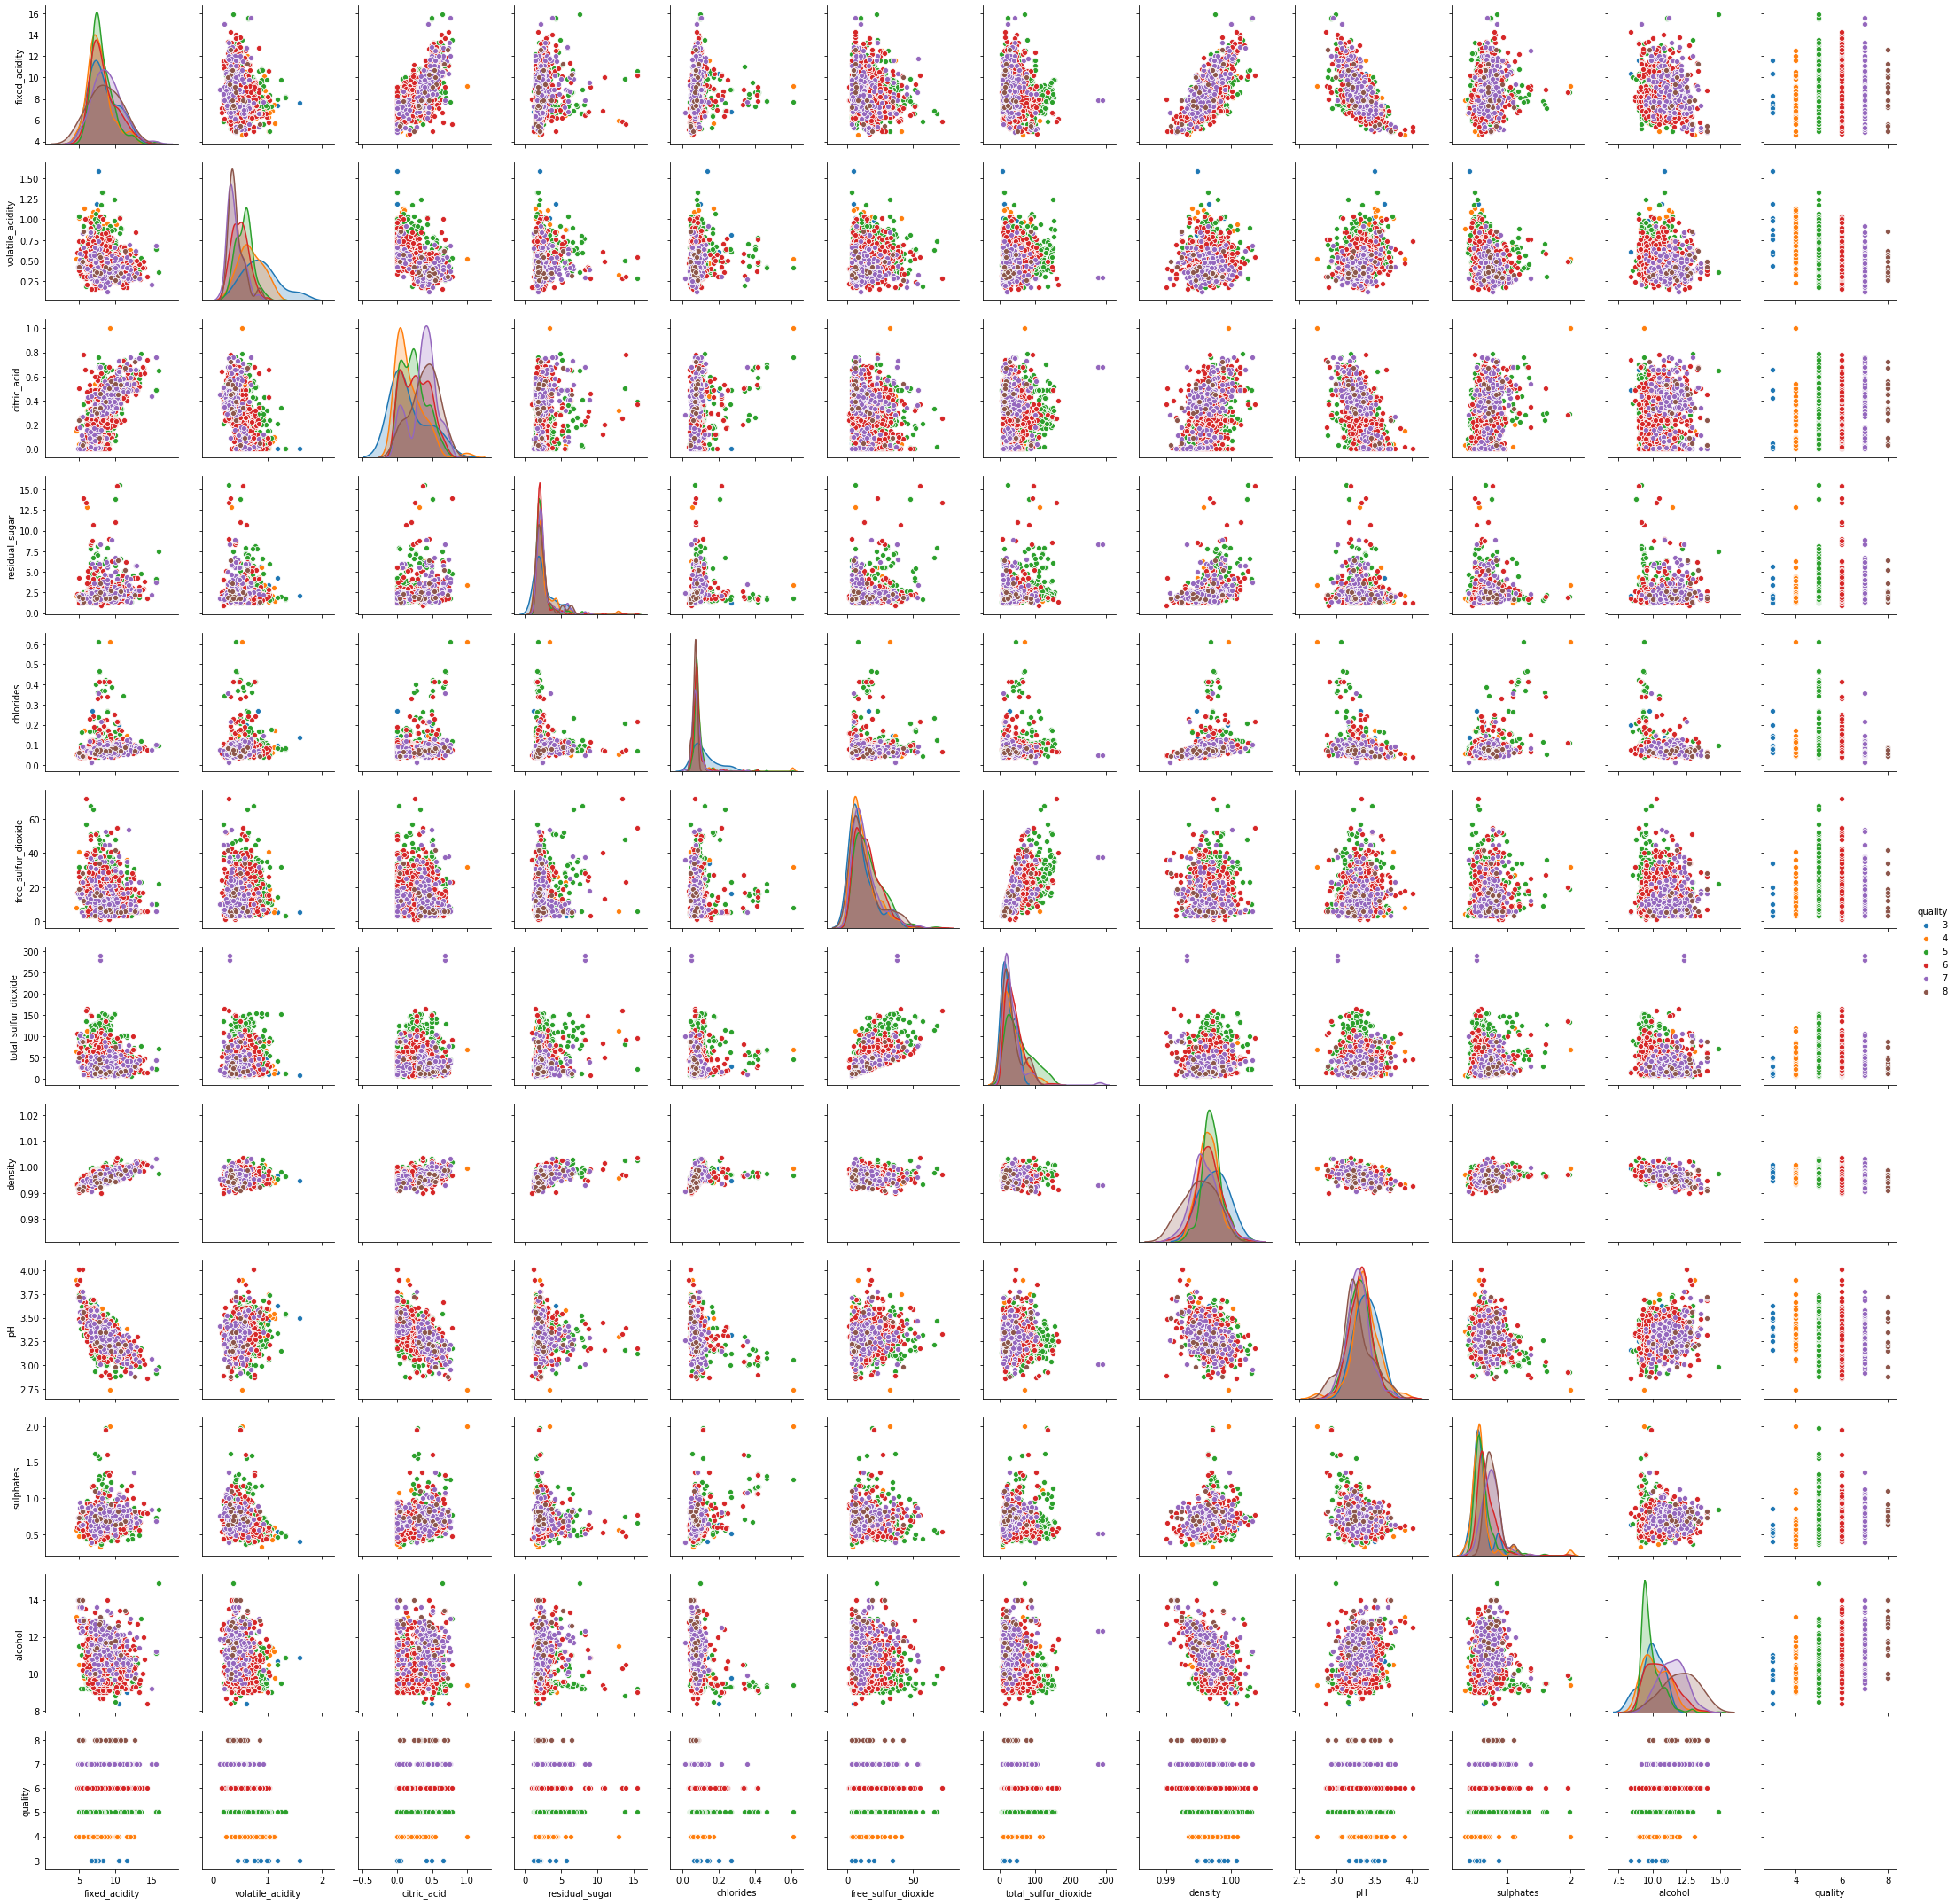

In [5]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='quality')

### For Clustering, removing the target variable i.e., quality

In [6]:
df2 = df.drop('quality',axis=1)

In [7]:
df2.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

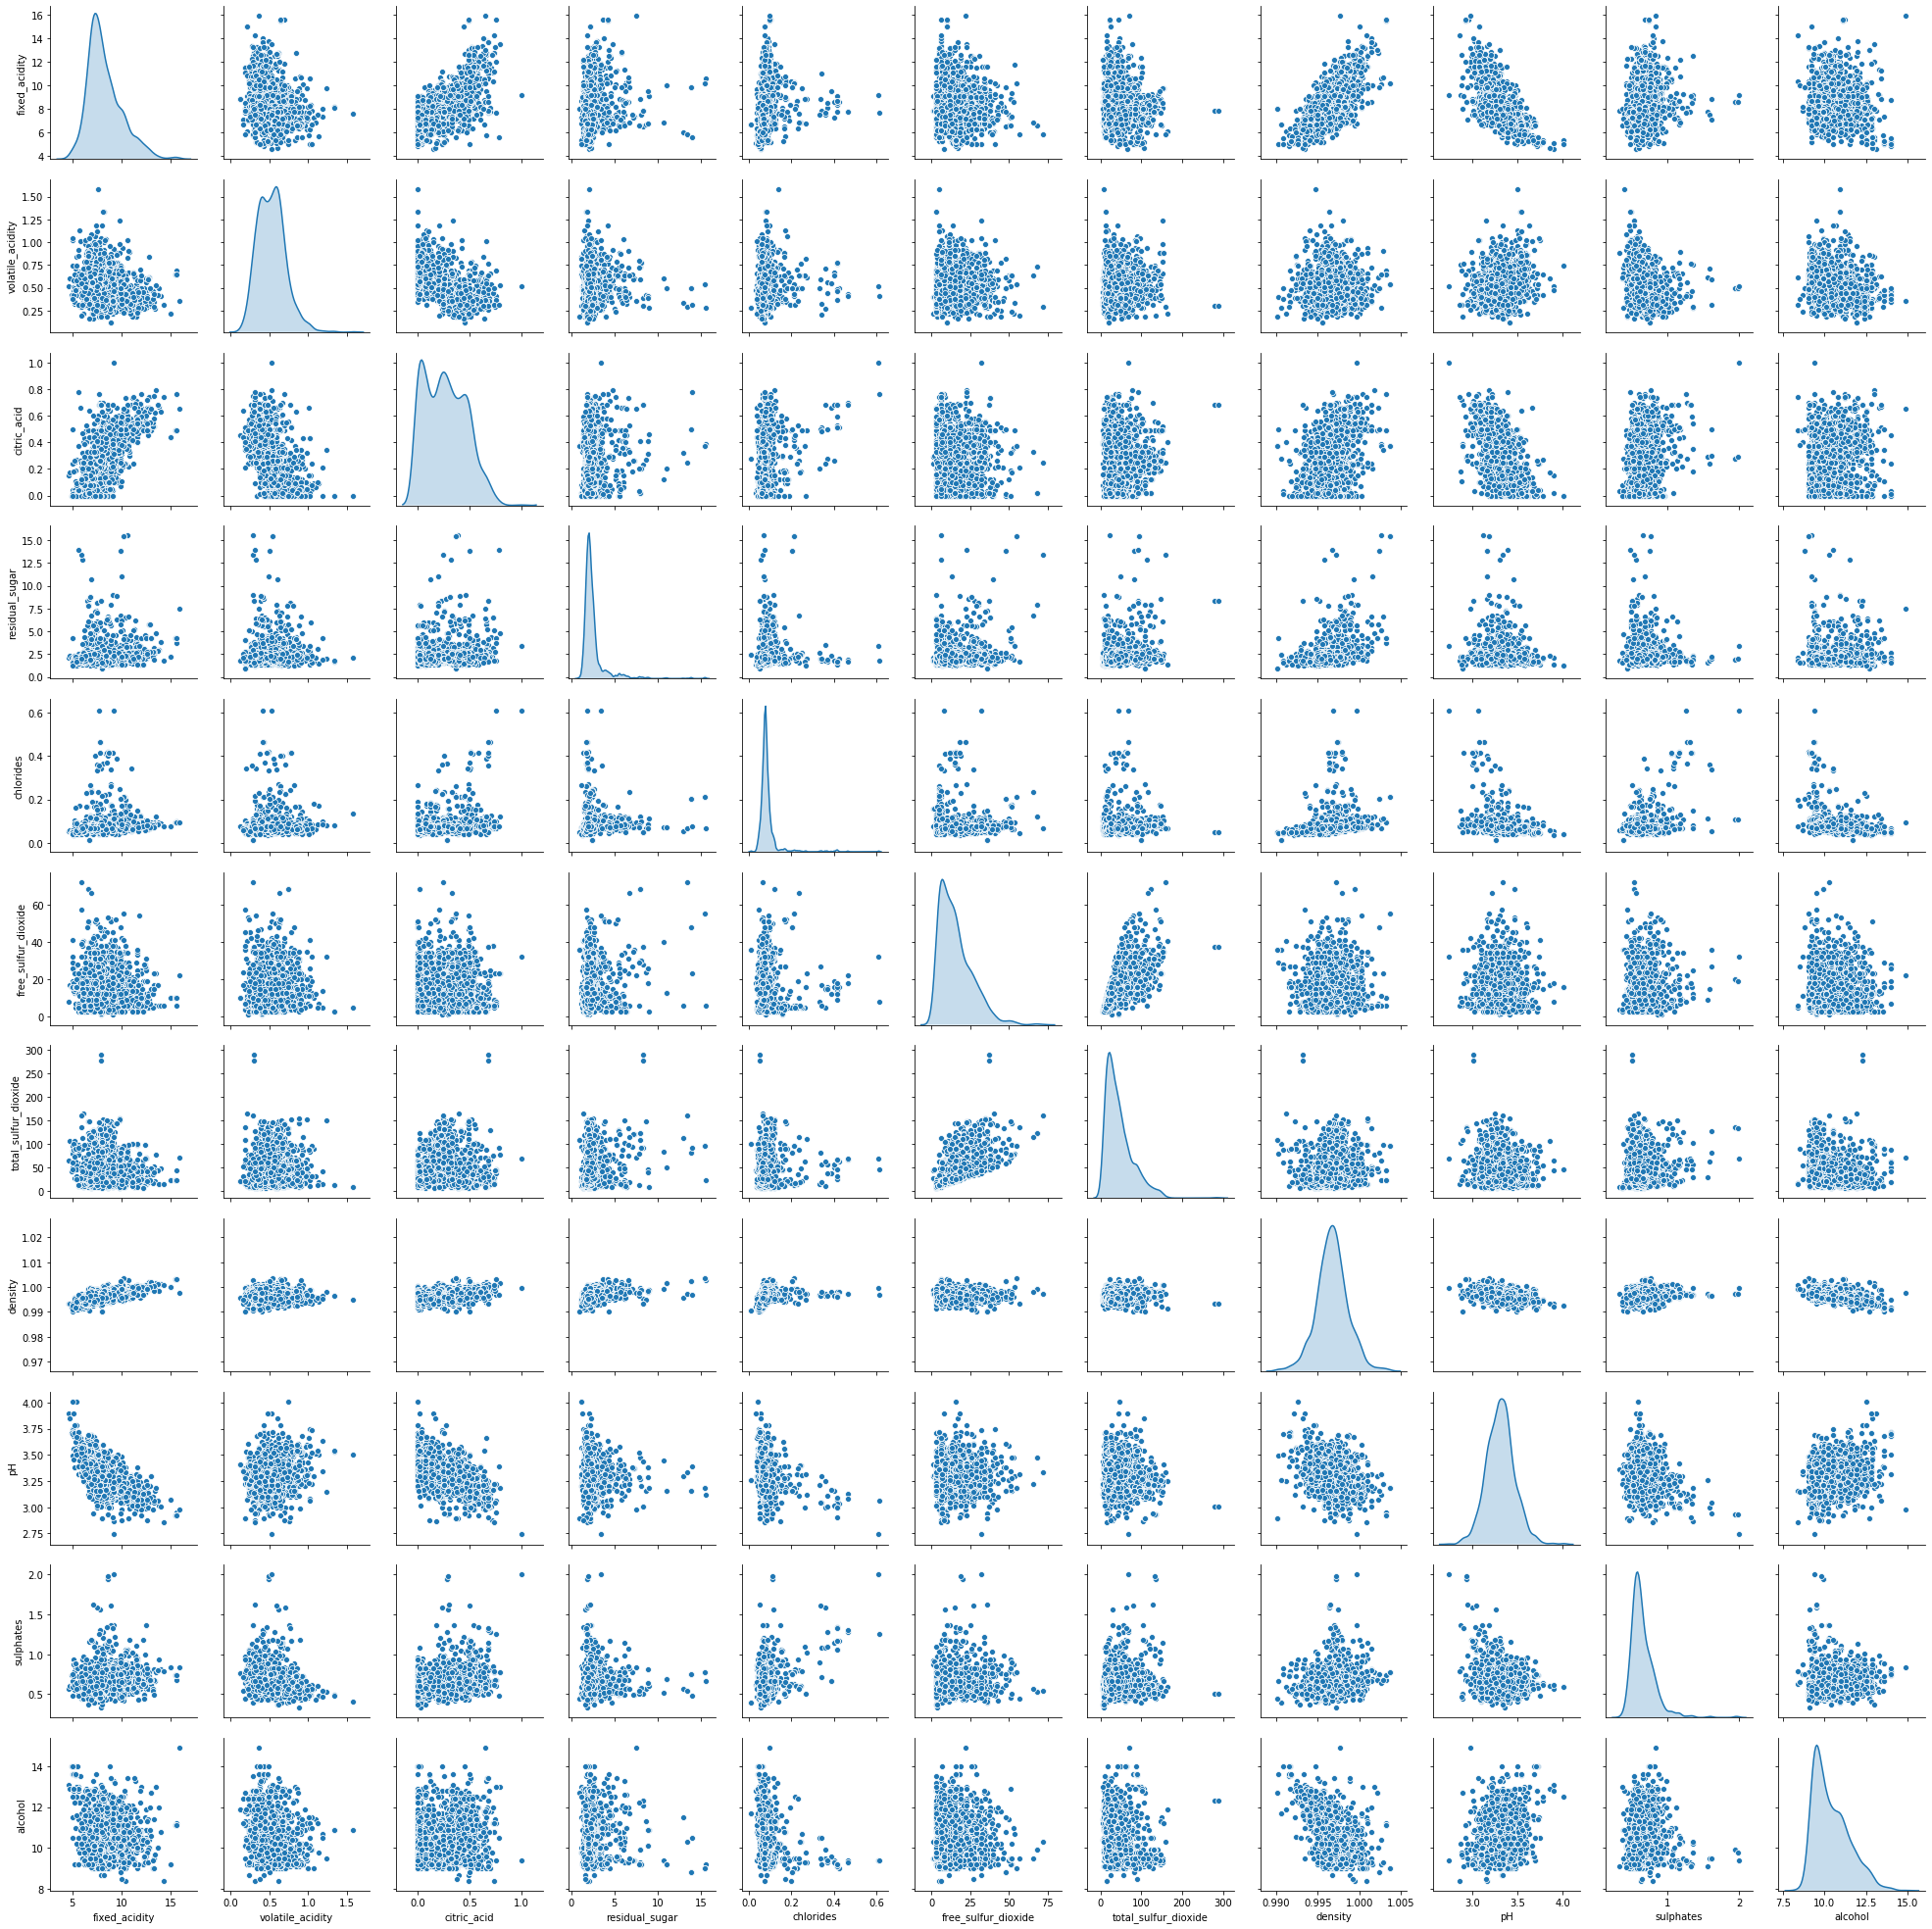

In [8]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

### K-Means Clustering

In [9]:
df_scaled = df2.apply(zscore)


In [10]:
df_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [11]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    17589.000000
1              2    14330.142460
2              3    12629.950272
3              4    11295.828163
4              5    10155.509585
5              6     9364.843259
6              7     8644.639865
7              8     8305.525744
8              9     7966.662835
9             10     7668.879157
10            11     7445.402188
11            12     7252.136512
12            13     7013.731066
13            14     6806.037134

#### The num_clusters at which the inertia stop to drop significantly (elbow method) will be the best num_cluster.

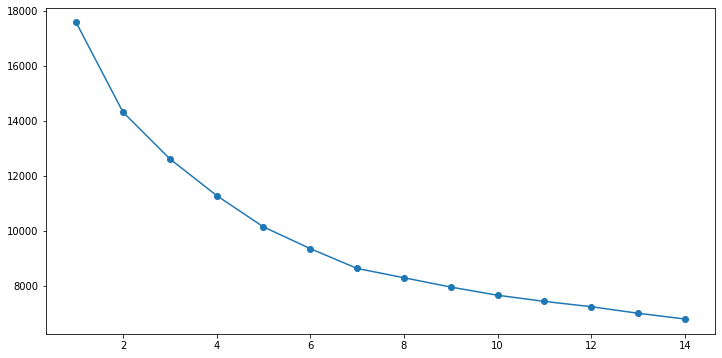

In [12]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### By the Elbow plot, we can say that there are significant drops till k=3 then a steady drop is there 
#### So K=3


In [13]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [14]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [15]:
centroids=kmeans.cluster_centers_

In [16]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [17]:
centroid_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.091932          0.040407     0.100025        0.403751  -0.005654   
1      -0.649455          0.453037    -0.758032       -0.230527  -0.188870   
2       1.007162         -0.684852     1.020769        0.031733   0.277158   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             1.068374              1.324583  0.283376 -0.179243  -0.187416   
1            -0.222691             -0.351748 -0.451080  0.614225  -0.288787   
2            -0.475737             -0.480496  0.440317 -0.753817   0.557237   

    alcohol  
0 -0.510528  
1  0.067626  
2  0.283386

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [18]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [19]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [20]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1       -0.298547          1.967442    -1.391472        0.043416   0.223875   
9       -0.470907         -0.155419     0.457144        2.526589  -0.349975   
11      -0.470907         -0.155419     0.457144        2.526589  -0.349975   
14       0.333436          0.514959    -0.467164        0.894790   1.881666   
15       0.333436          0.514959    -0.415813        0.965737   1.754143   

    free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
1              0.872638              0.624363  0.028261 -0.719933   0.128950   
9              0.107592              1.688677  0.558274  0.251958   0.837107   
11             0.107592              1.688677  0.558274  0.251958   0.837107   
14             3.454669              2.996263  0.982285 -0.979104   1.309212   
15             3.359038              3.087490  0.982285 -0.914312   1.604277   

     alcohol labels  
1  -0.584777      0  
9   0.072294      0  
11  0.072294      0  
14 -1.147981      0  
15 -1.147981      0

### Calculating Inertia(error)

In [21]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [22]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [23]:
tot_I=I0+I1+I2
print(tot_I)

12629.95027174133


In [24]:
kmeans.inertia_

12629.950271741342

### Visualizing the clusters

C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


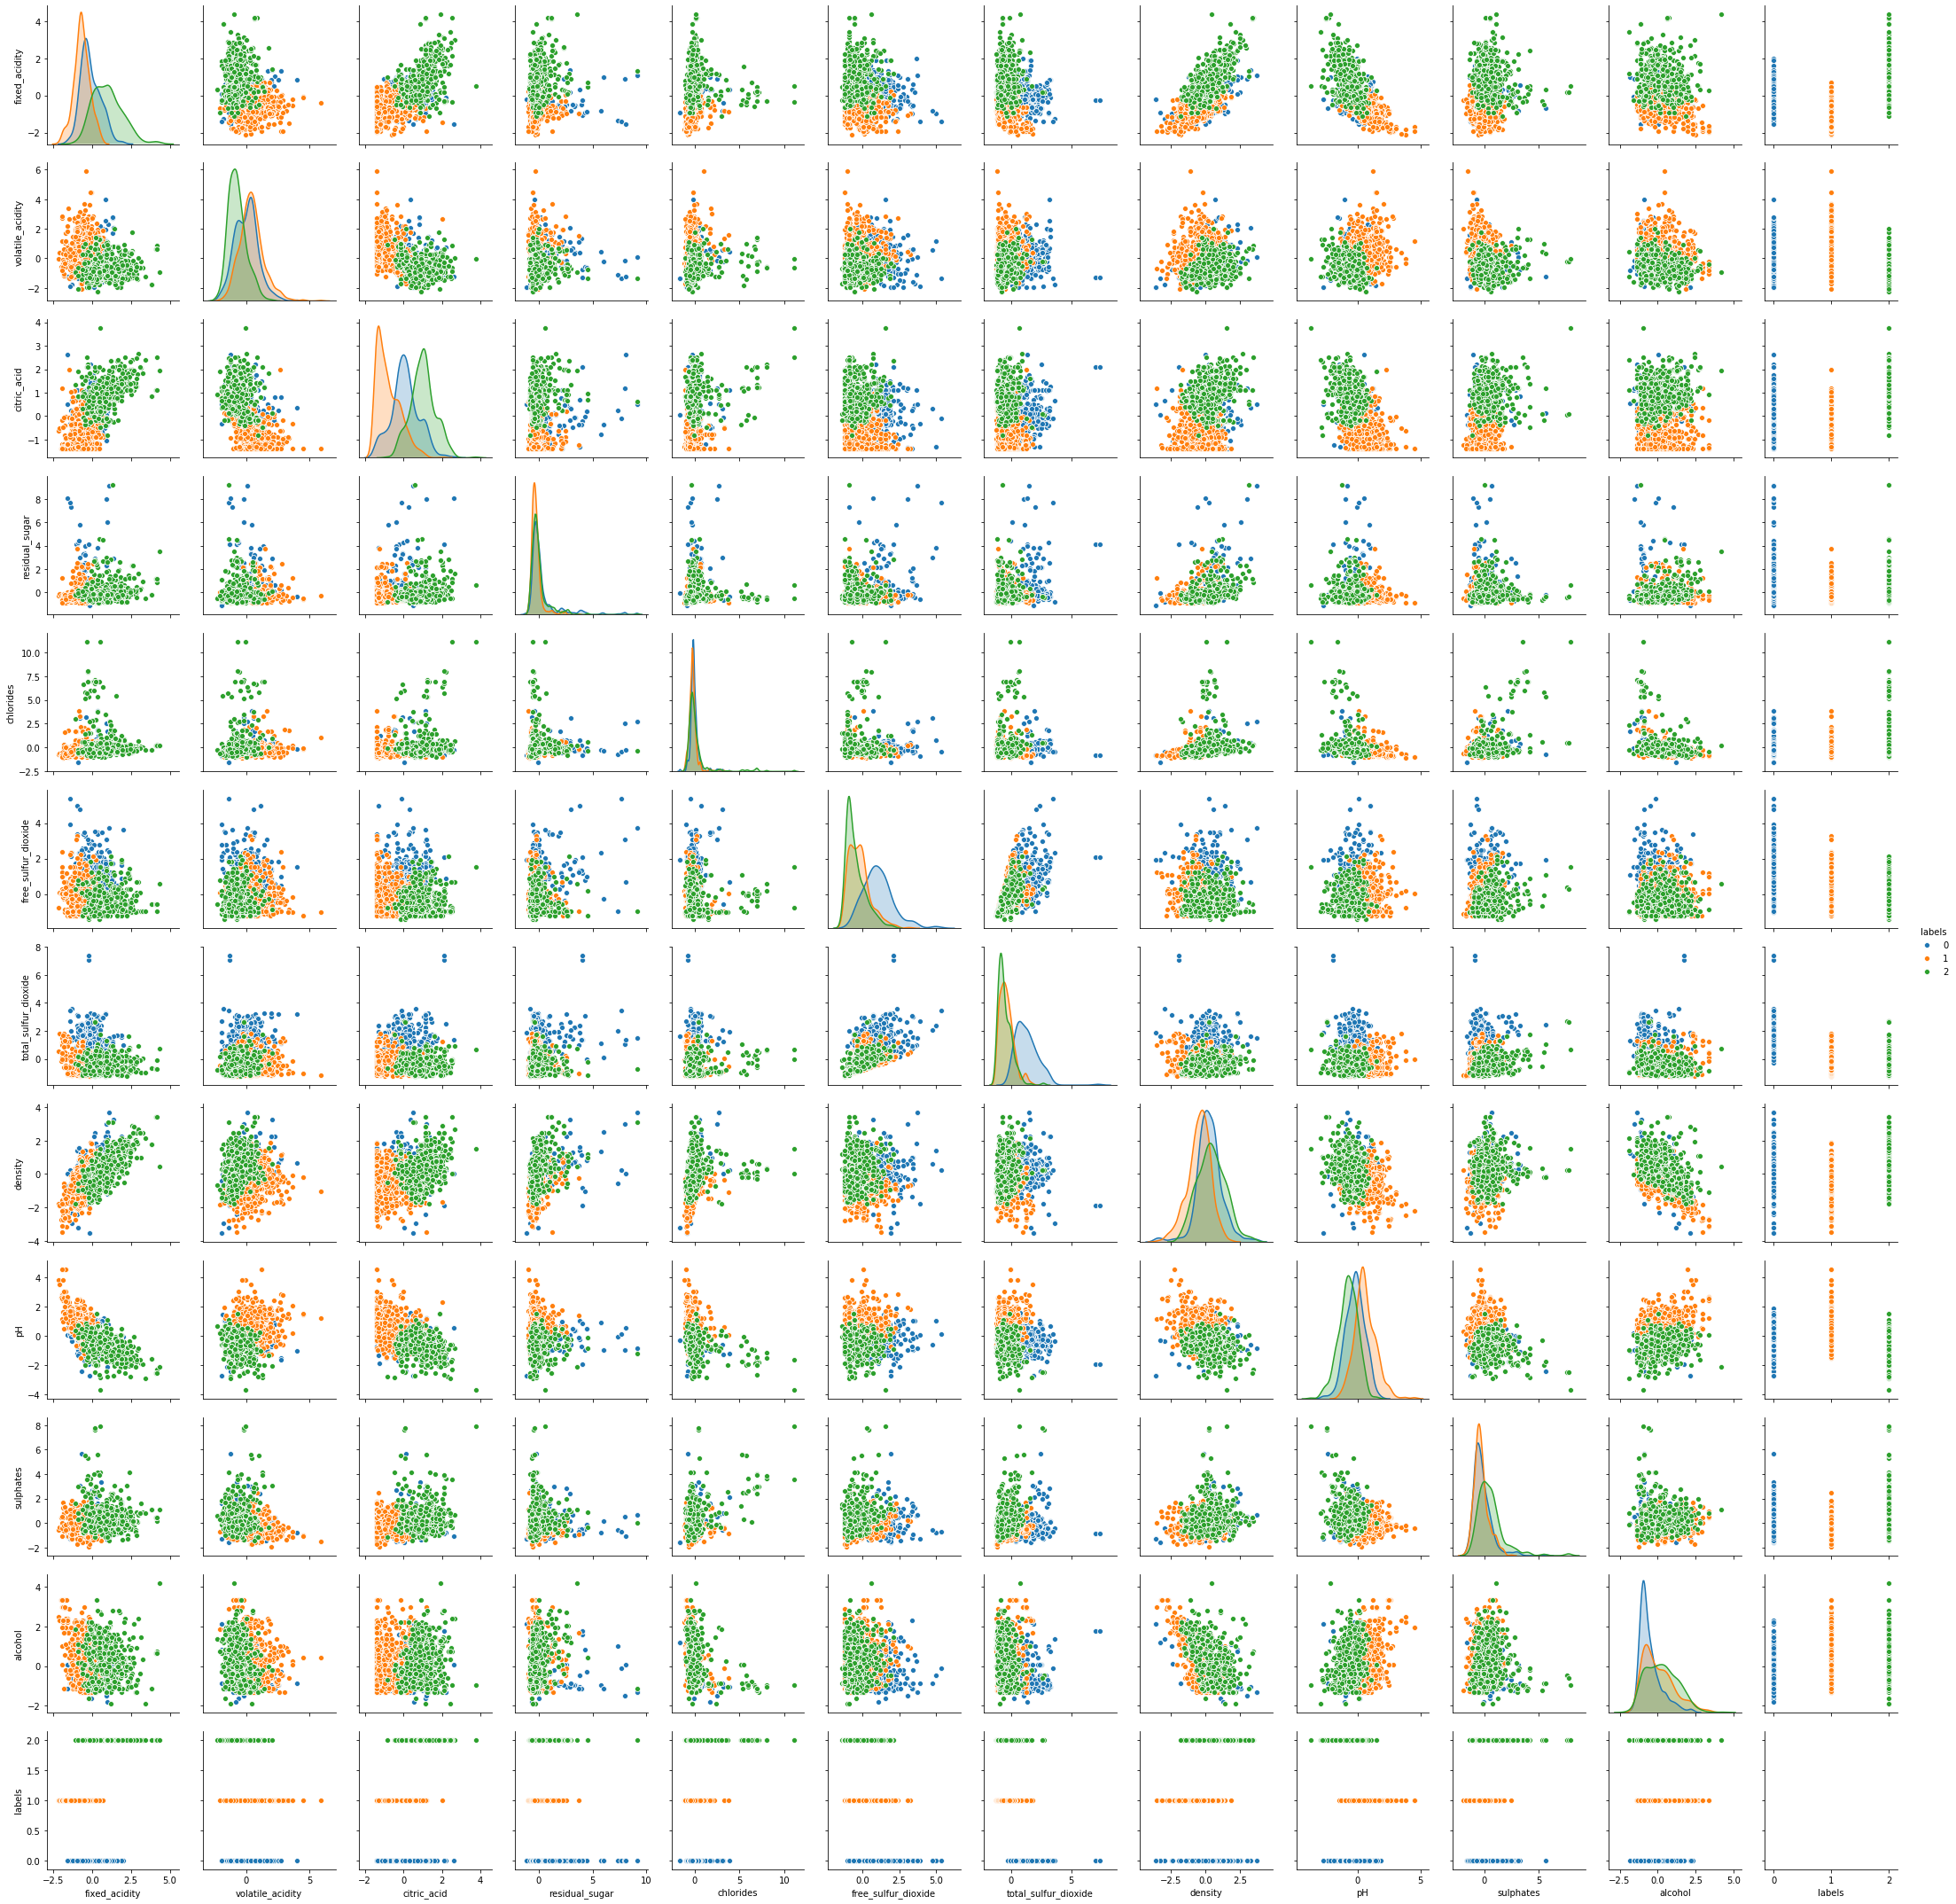

In [25]:
sns.pairplot(finaldf,diag_kind='kde',hue='labels')

### Silhouette Score

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2139417458778928


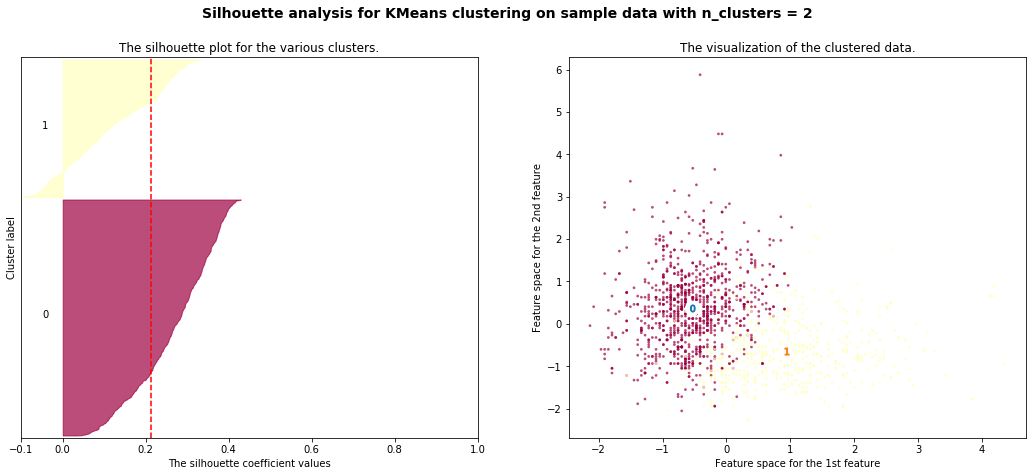

For n_clusters = 3 The average silhouette_score is : 0.18924495959290374


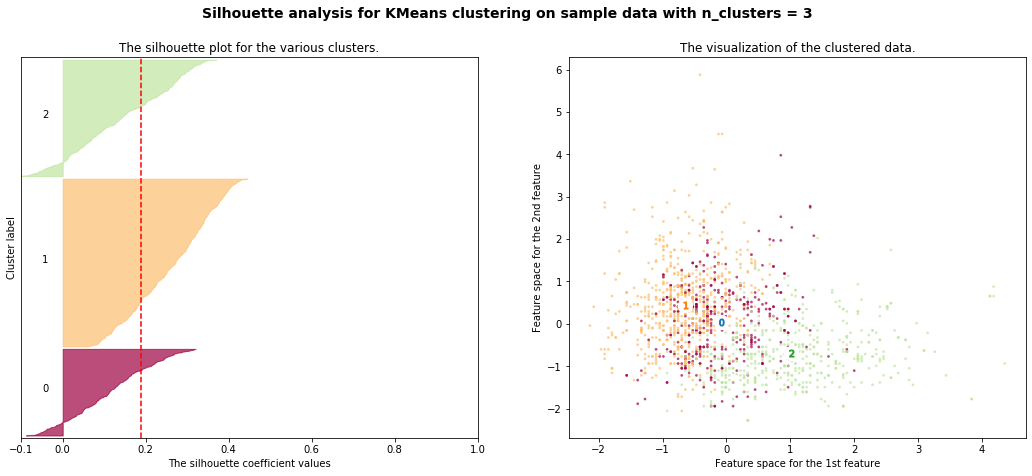

For n_clusters = 4 The average silhouette_score is : 0.2052905058392147


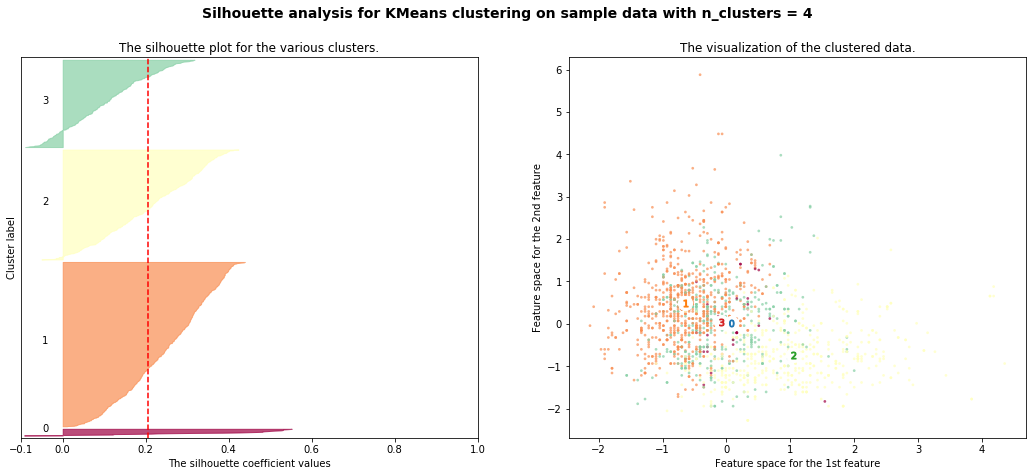

For n_clusters = 5 The average silhouette_score is : 0.19013920663576794


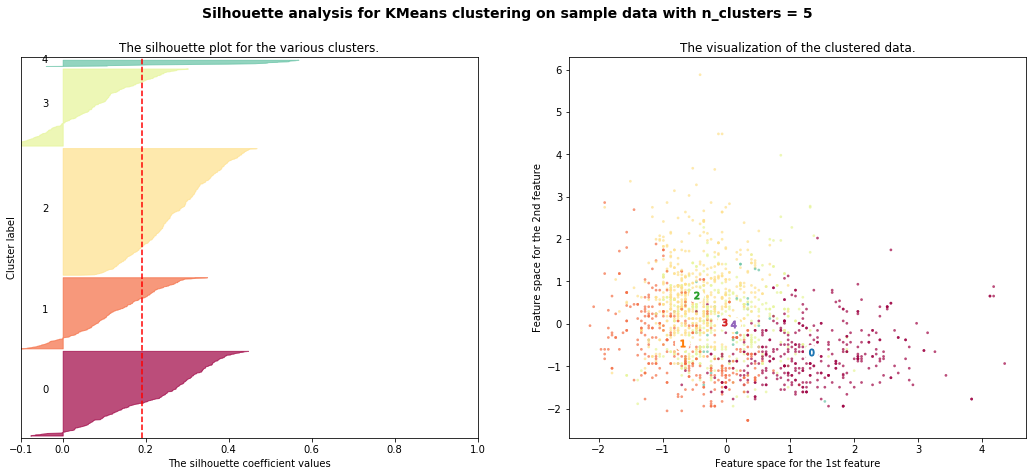

For n_clusters = 6 The average silhouette_score is : 0.19259313246587992


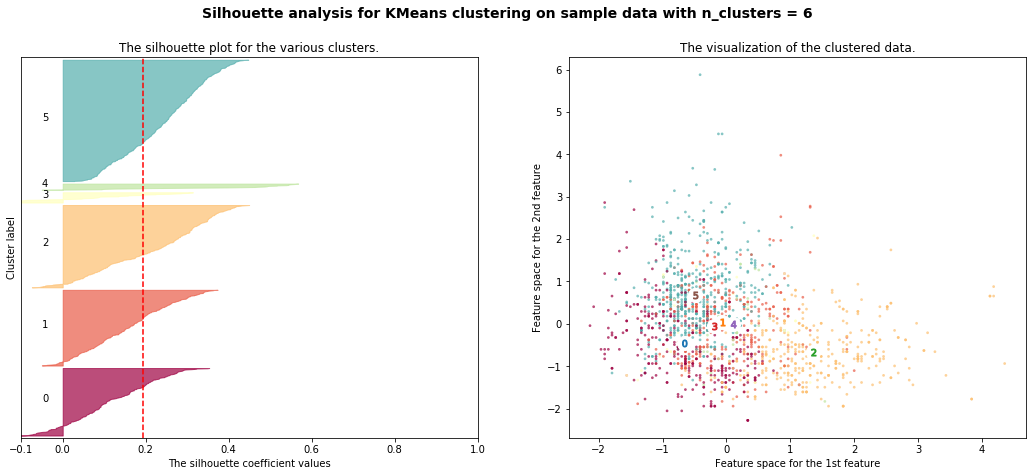

For n_clusters = 7 The average silhouette_score is : 0.190358973807942


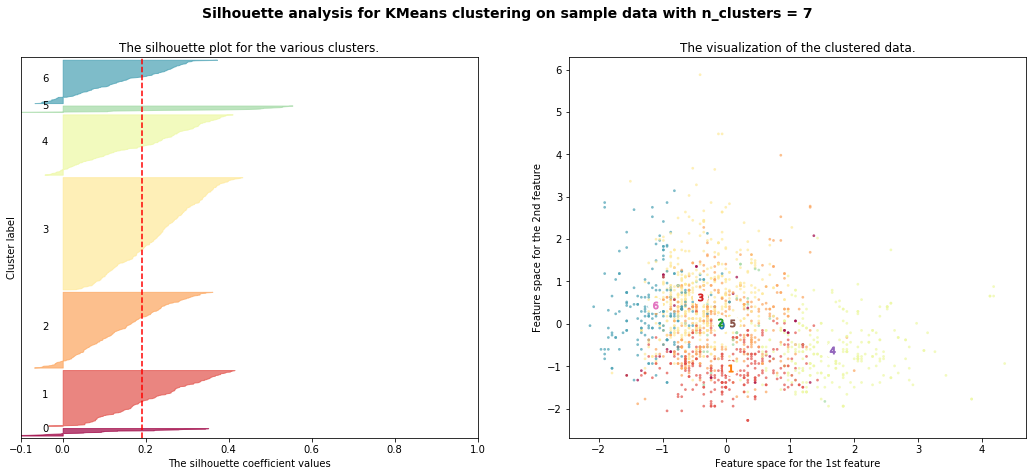

For n_clusters = 8 The average silhouette_score is : 0.15031946045936107


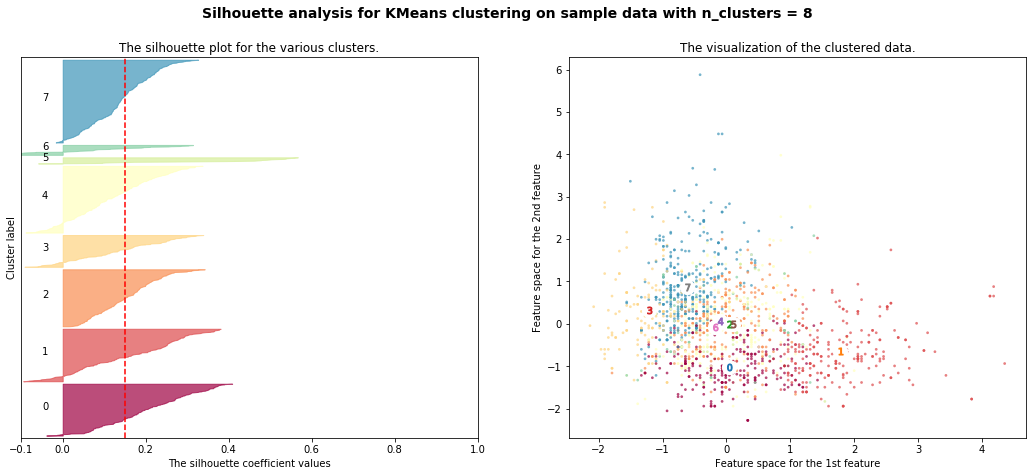

For n_clusters = 9 The average silhouette_score is : 0.15426870411159044


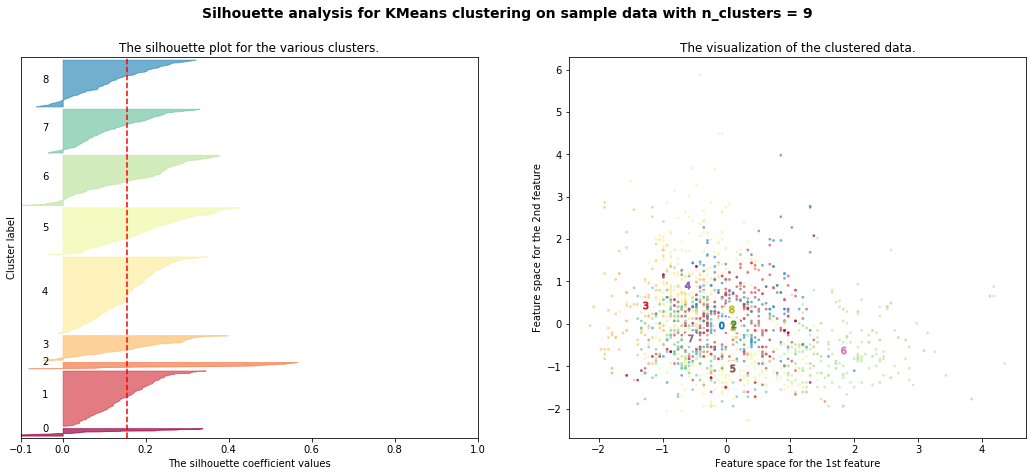

For n_clusters = 10 The average silhouette_score is : 0.15709033826792776


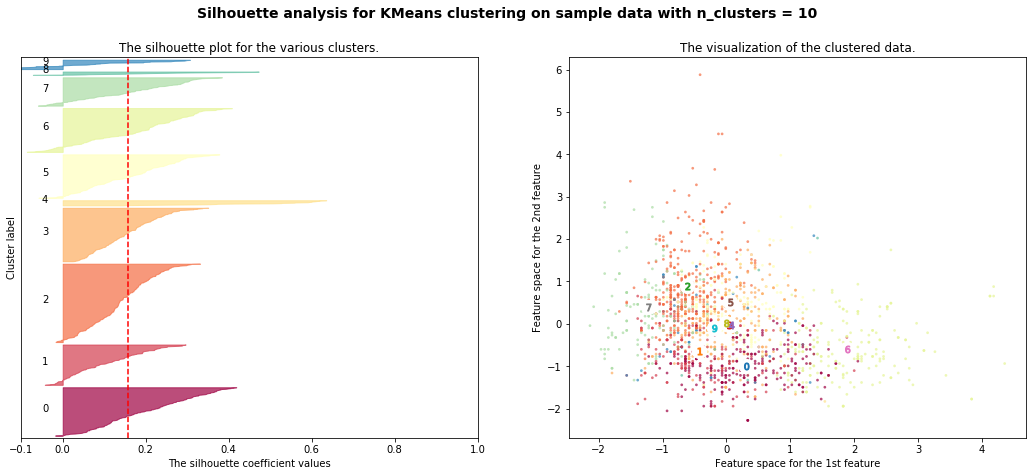

For n_clusters = 11 The average silhouette_score is : 0.1526417506218849


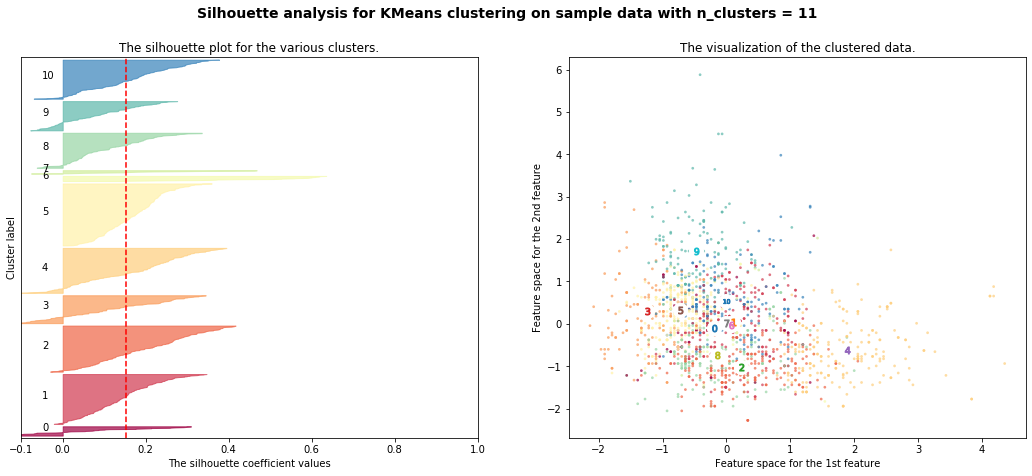

For n_clusters = 12 The average silhouette_score is : 0.13565111684122388


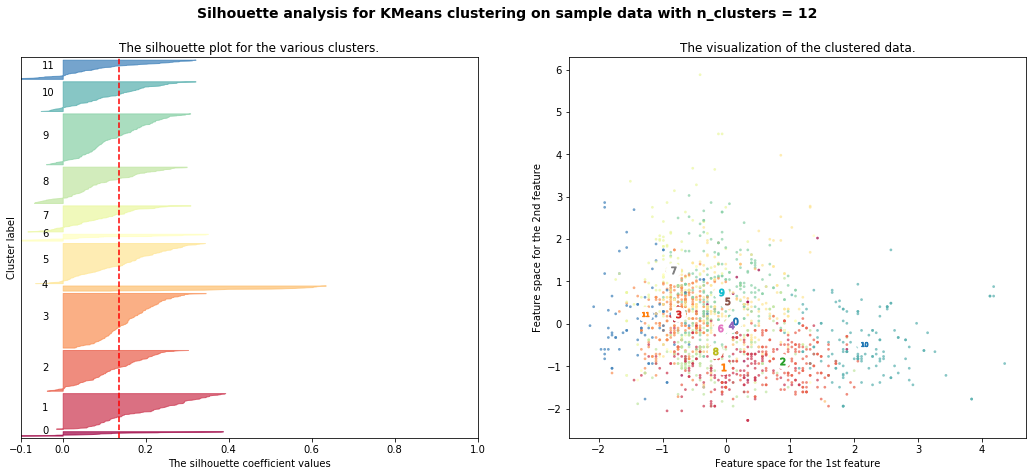

For n_clusters = 13 The average silhouette_score is : 0.145539416258602


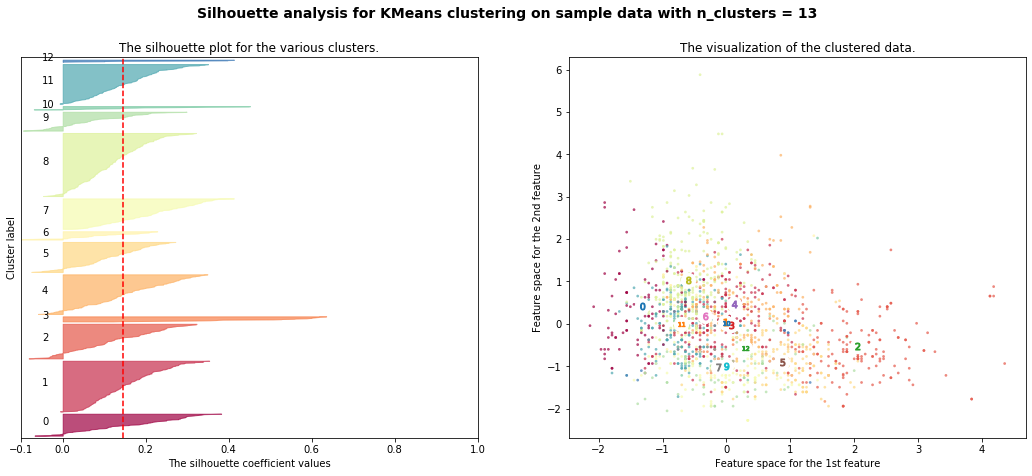

For n_clusters = 14 The average silhouette_score is : 0.14523633706031425


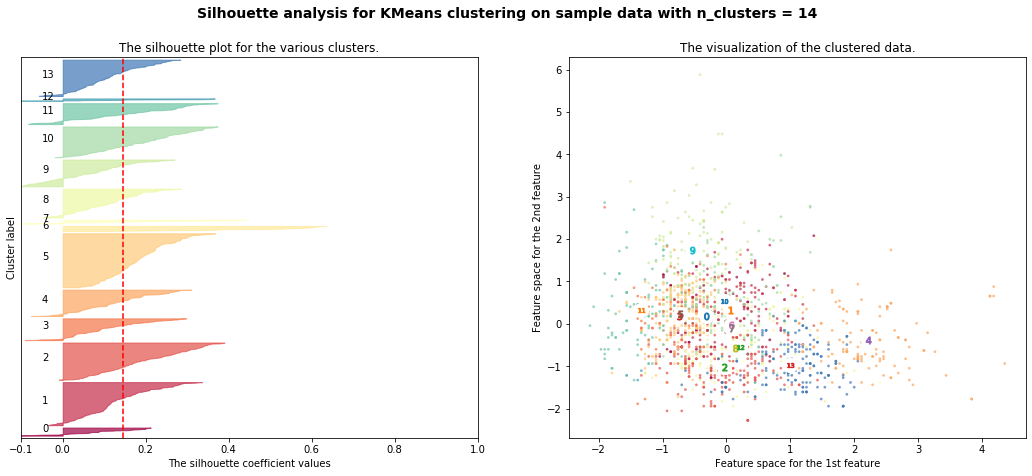

For n_clusters = 15 The average silhouette_score is : 0.1428245456644743


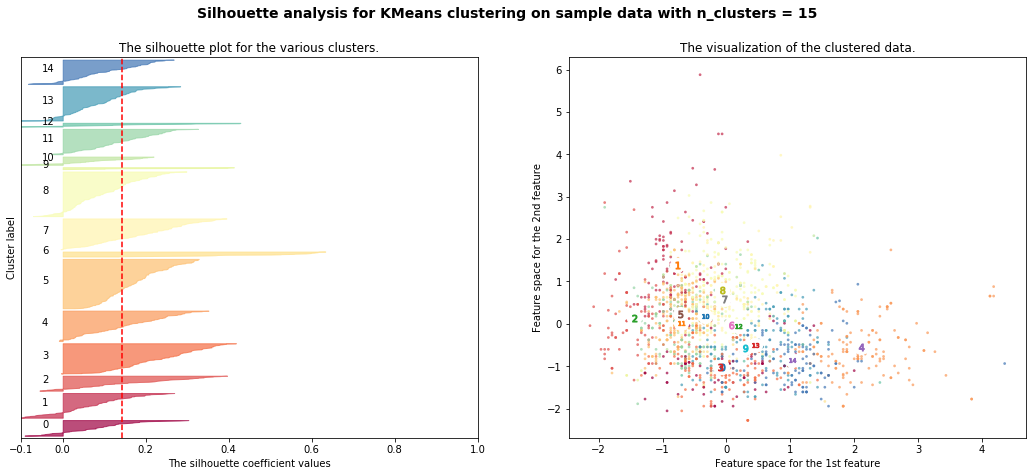

In [26]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### The Silhouette score is highest for k=2, this is not supporting the k we have taken i.e.,3


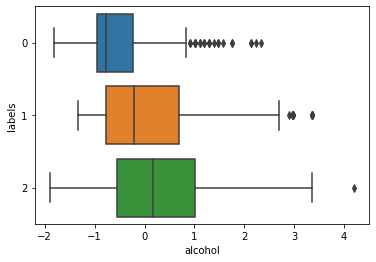

In [27]:
import seaborn as sns
sns.boxplot(x='alcohol', y = 'labels', data = finaldf)

### Using Boxplot to determine which features are significant

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001958D417788>,
      dtype=object)

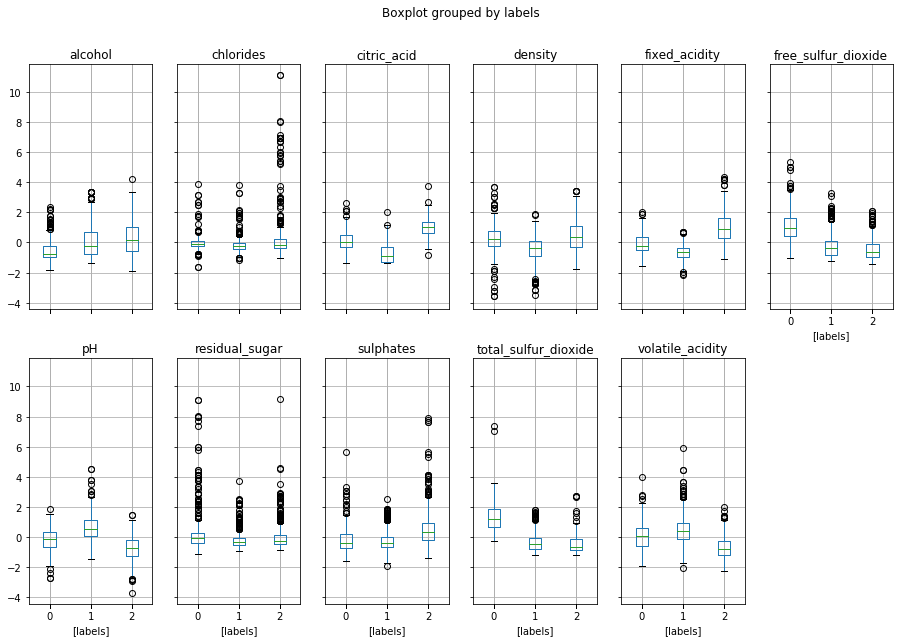

In [28]:
finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))

### By the Boxplot, we can say that the most significant variables are 'volatile_acidity','citric_acid','alcohol'.

## Agglomerative Clustering Dendogram

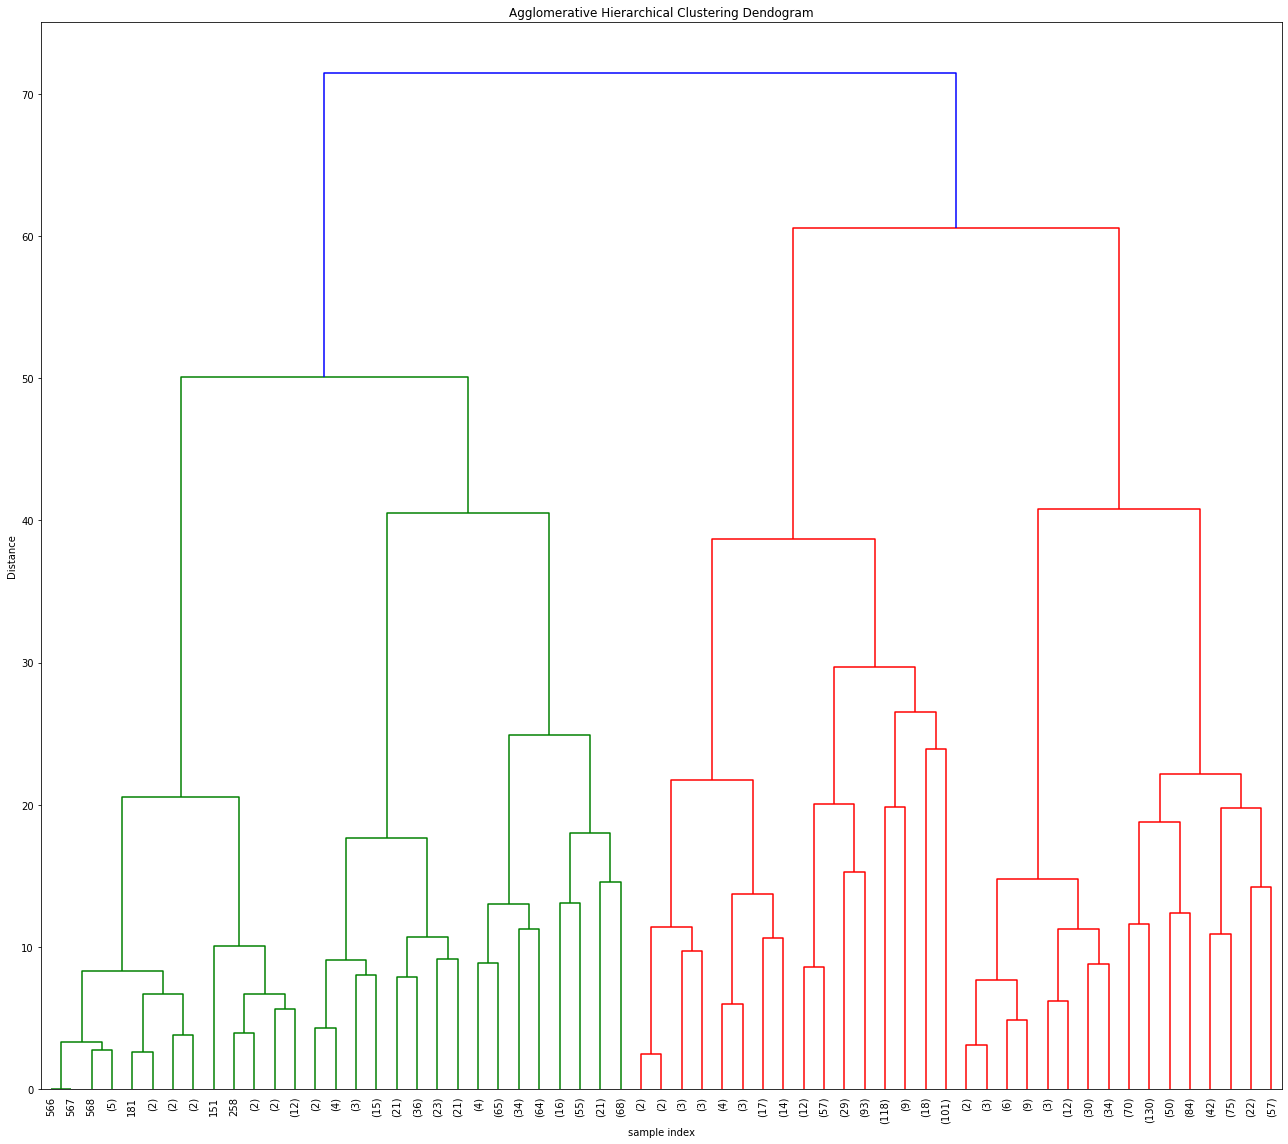

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### Dendogram helps us see the cluster formation from a granular level

#### By Dendogram, We can say that there are 2 clusters first then 3 

## Now let's consider the most important features (Volatile Acidity, Citric Acid and Alcohol)

In [30]:
df2 = df.drop('quality',axis=1)
df2 = df2[['volatile_acidity','citric_acid','alcohol']]

In [31]:
df2.head()

volatile_acidity  citric_acid  alcohol
0              0.70         0.00      9.4
1              0.88         0.00      9.8
2              0.76         0.04      9.8
3              0.28         0.56      9.8
4              0.70         0.00      9.4

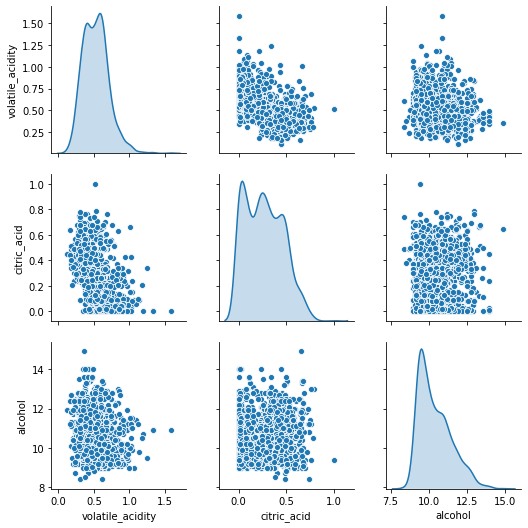

In [32]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [33]:
df_scaled = df2.apply(zscore)

In [34]:
df_scaled.head()

volatile_acidity  citric_acid   alcohol
0          0.961877    -1.391472 -0.960246
1          1.967442    -1.391472 -0.584777
2          1.297065    -1.186070 -0.584777
3         -1.384443     1.484154 -0.584777
4          0.961877    -1.391472 -0.960246

In [35]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1     4797.000000
1              2     2887.349823
2              3     2208.625219
3              4     1803.232989
4              5     1533.690398
5              6     1372.798612
6              7     1248.173614
7              8     1144.367526
8              9     1049.942725
9             10      972.462479
10            11      904.833949
11            12      857.261031
12            13      815.752292
13            14      771.012860

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

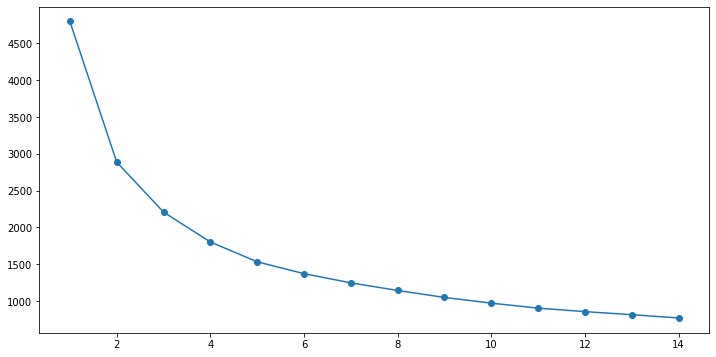

In [36]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Here in the elbow plot, we can see that there is a very significant drop at k=2

In [37]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [38]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2, n_init=15, random_state=2)

In [39]:
centroids=kmeans.cluster_centers_

In [40]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [41]:
centroid_df

volatile_acidity  citric_acid   alcohol
0         -0.763433     0.838815  0.342699
1          0.649448    -0.713575 -0.291532

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [42]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [43]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [44]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
finaldf = pd.concat([df0,df1])
finaldf.head()

volatile_acidity  citric_acid   alcohol labels
3          -1.384443     1.484154 -0.584777      0
9          -0.155419     0.457144  0.072294      0
11         -0.155419     0.457144  0.072294      0
16         -1.384443     1.484154  0.072294      0
19         -1.160984     1.227401 -1.147981      0

### Calculating Inertia(error)

In [45]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]

In [46]:
I0=0
I1=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
  

In [47]:
tot_I=I0+I1
print(tot_I)

2887.349822781873


In [48]:
kmeans.inertia_

2887.3498227818745

### Visualizing the clusters

C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


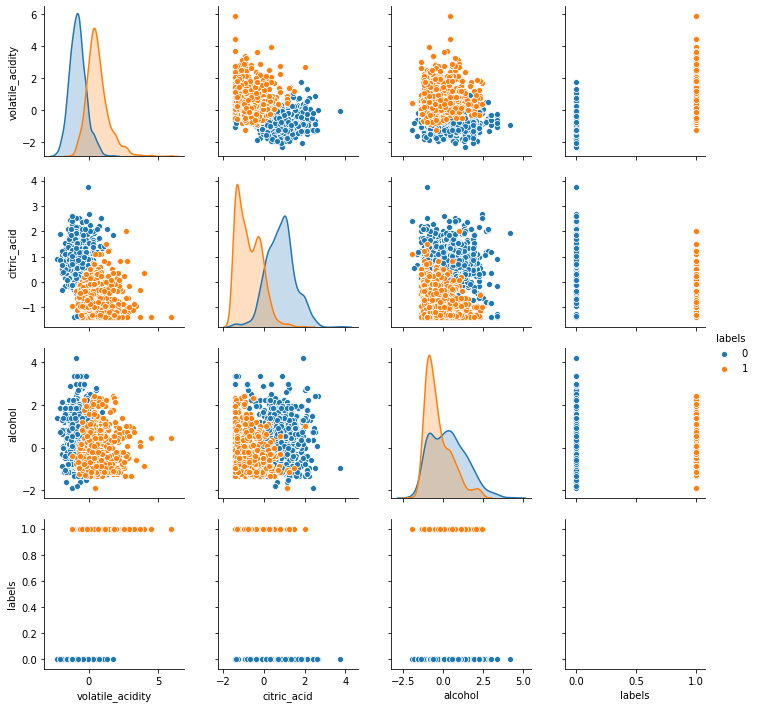

In [49]:
sns.pairplot(finaldf,diag_kind='kde',hue='labels')

### Silhouette score

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3669138543934959


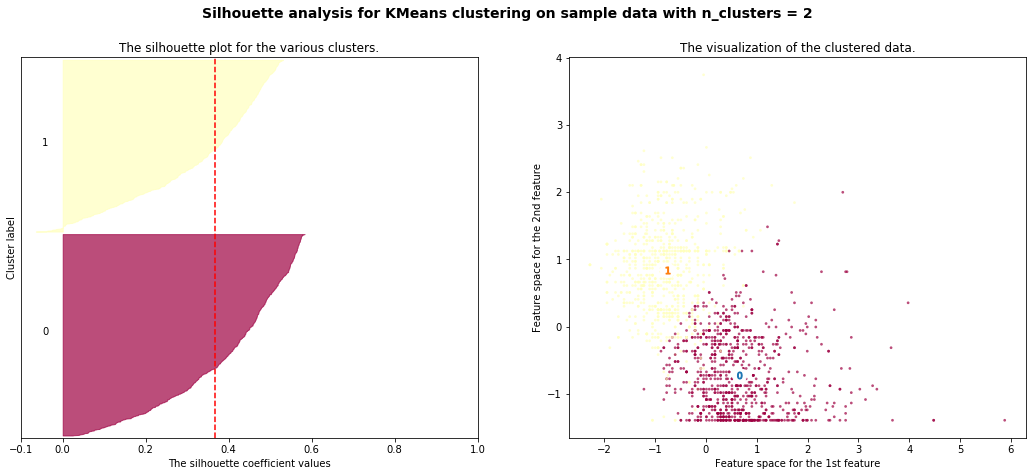

For n_clusters = 3 The average silhouette_score is : 0.31794940291385304


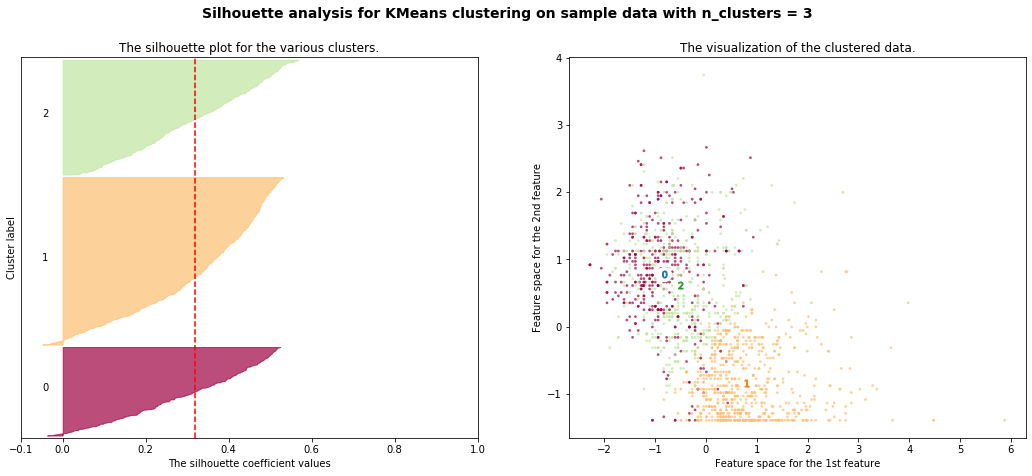

For n_clusters = 4 The average silhouette_score is : 0.31411163992157315


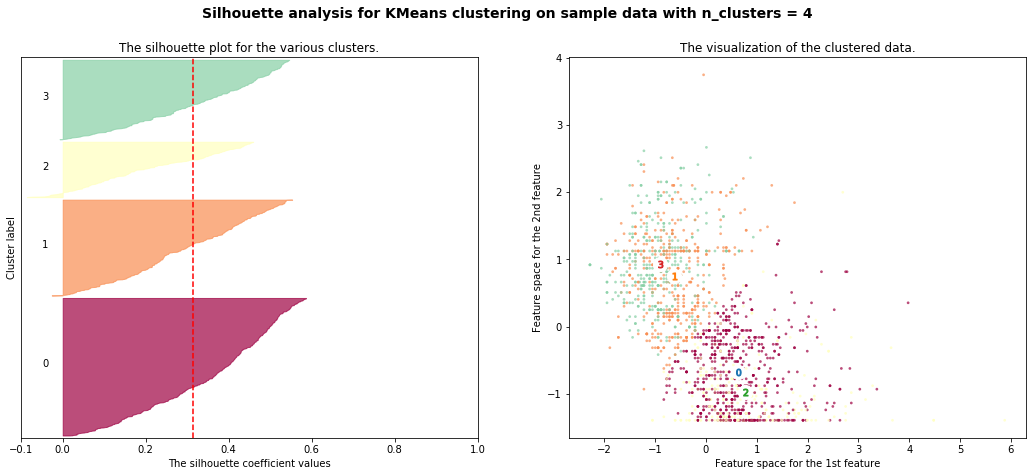

For n_clusters = 5 The average silhouette_score is : 0.31130624344444136


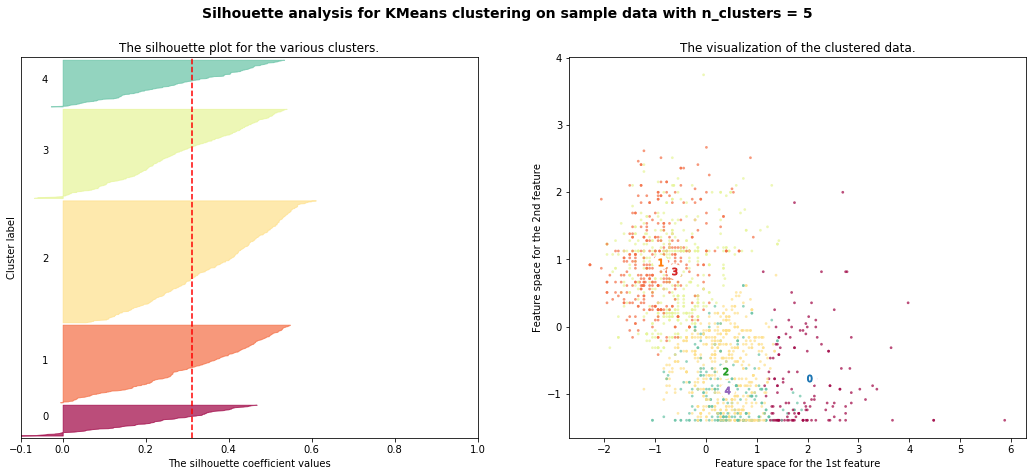

For n_clusters = 6 The average silhouette_score is : 0.2787415893512027


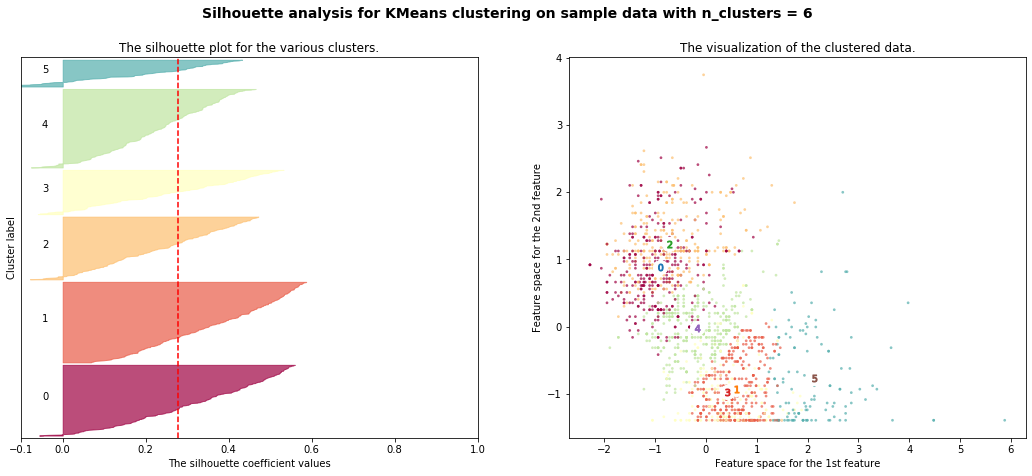

For n_clusters = 7 The average silhouette_score is : 0.26244059554365


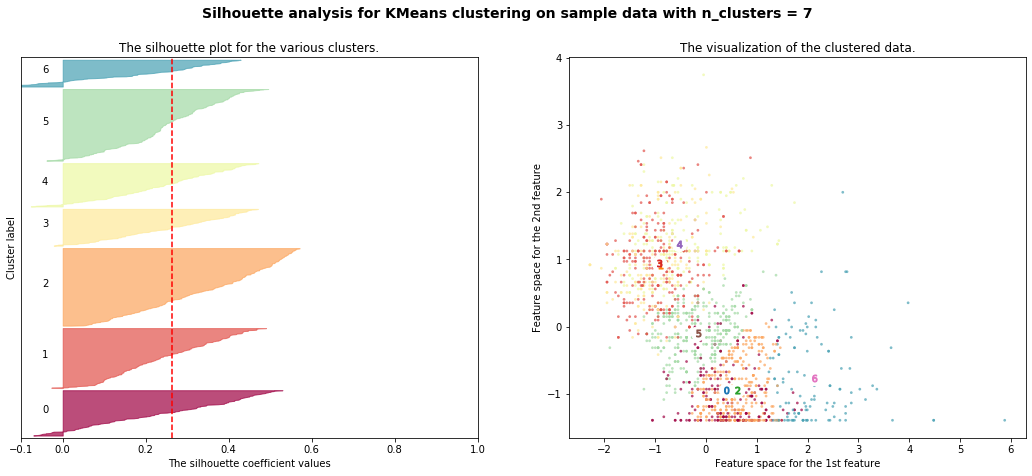

For n_clusters = 8 The average silhouette_score is : 0.2681187466768722


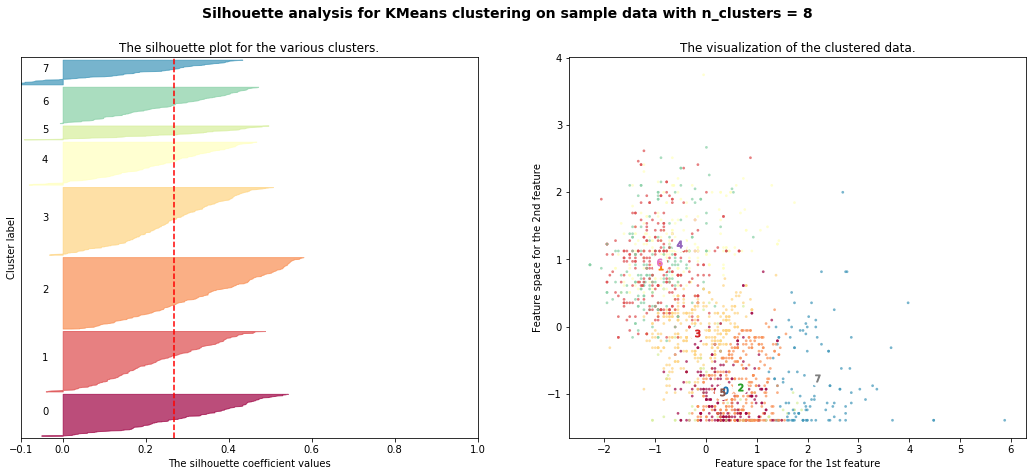

For n_clusters = 9 The average silhouette_score is : 0.2740010410856594


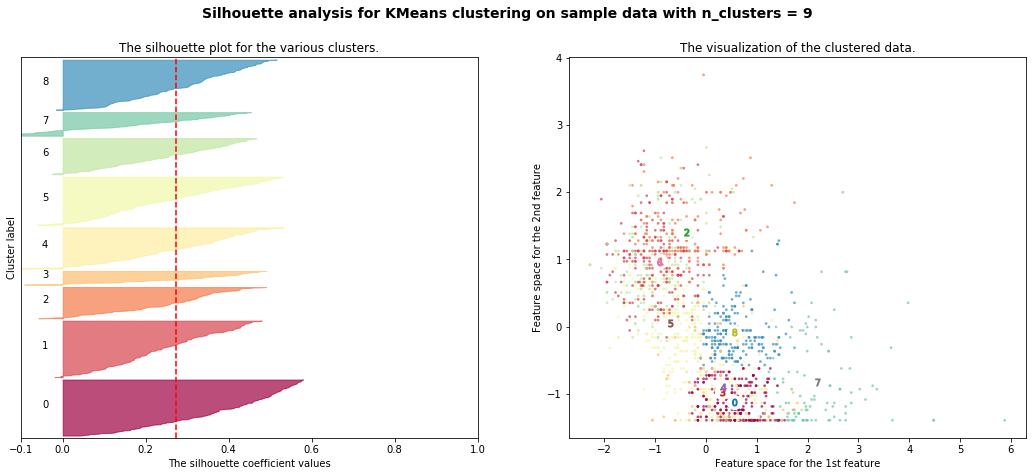

For n_clusters = 10 The average silhouette_score is : 0.2782524602255958


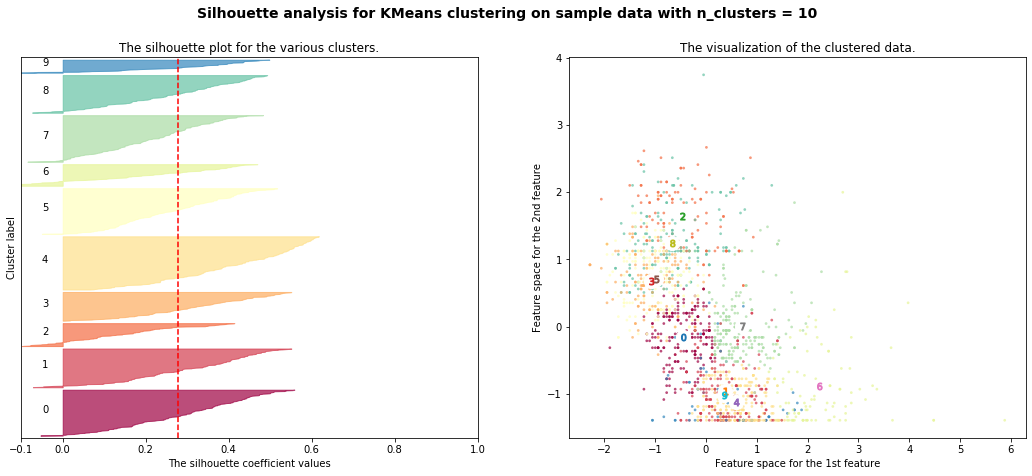

For n_clusters = 11 The average silhouette_score is : 0.2814190996913678


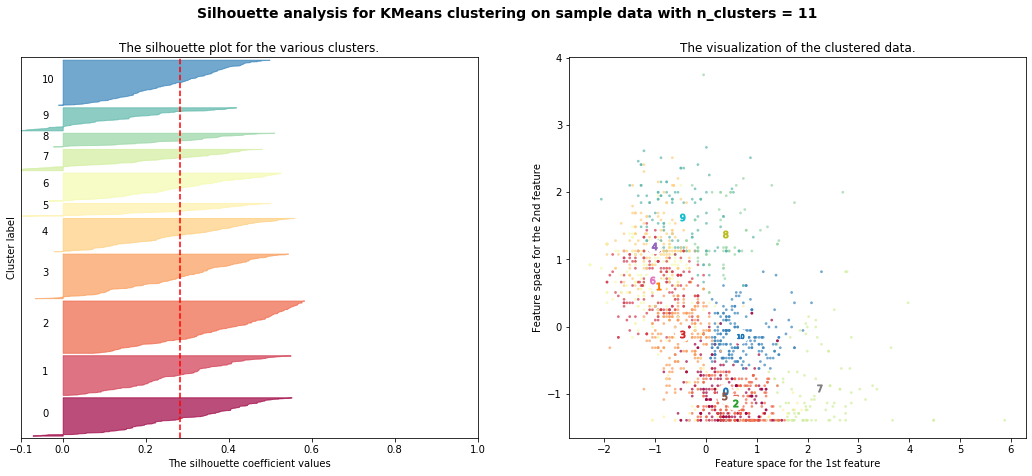

For n_clusters = 12 The average silhouette_score is : 0.2806737933430034


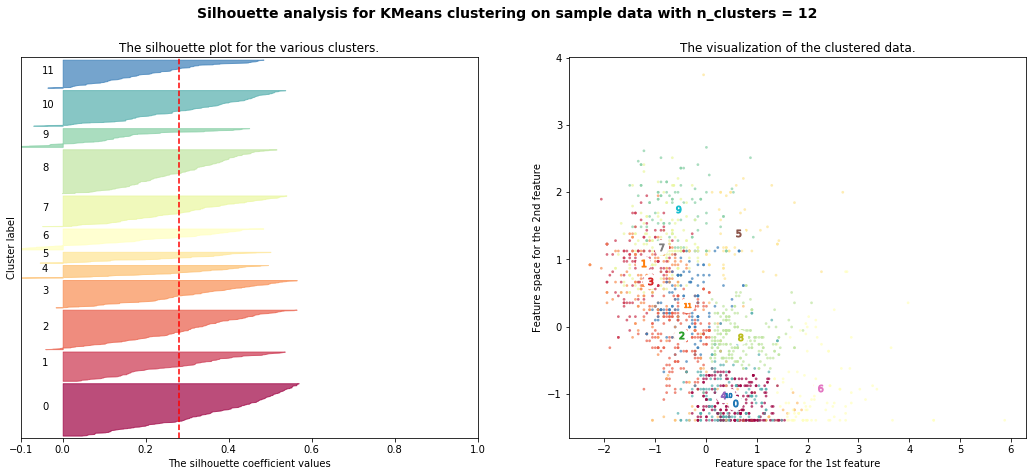

For n_clusters = 13 The average silhouette_score is : 0.27582616084473643


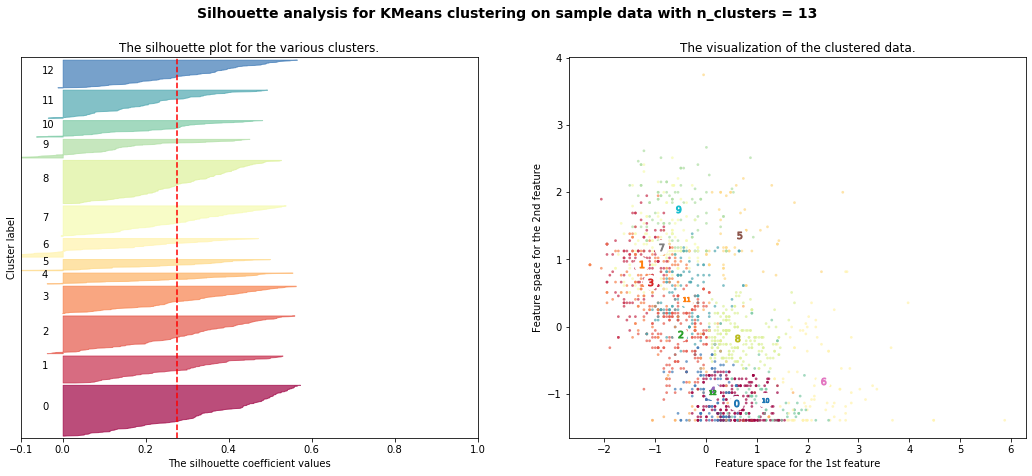

For n_clusters = 14 The average silhouette_score is : 0.2774735507293208


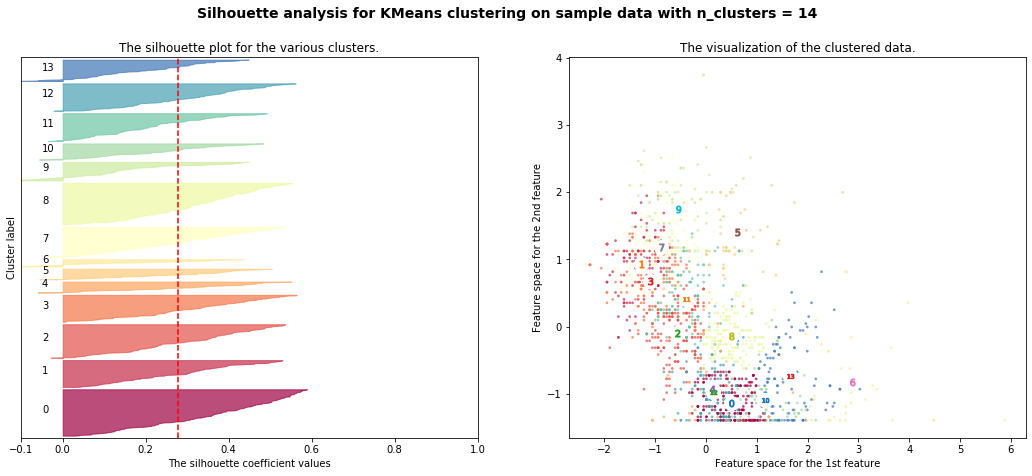

For n_clusters = 15 The average silhouette_score is : 0.2817664173602744


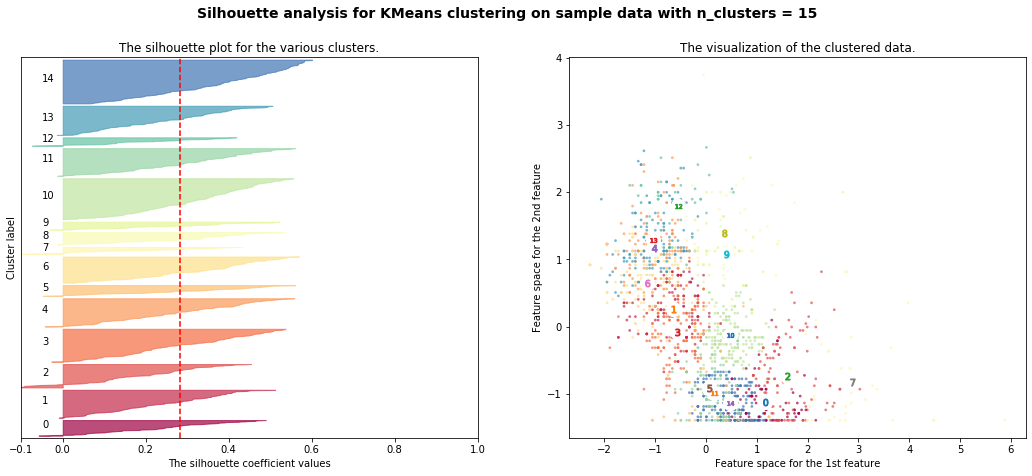

In [50]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### The silhouette score is highest at k=2

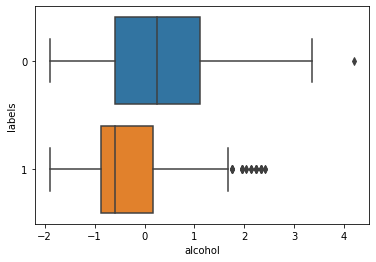

In [51]:
import seaborn as sns
sns.boxplot(x='alcohol', y = 'labels', data = finaldf)

### By Boxplot we can see the seperation of the clusters for the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019598836708>,
      dtype=object)

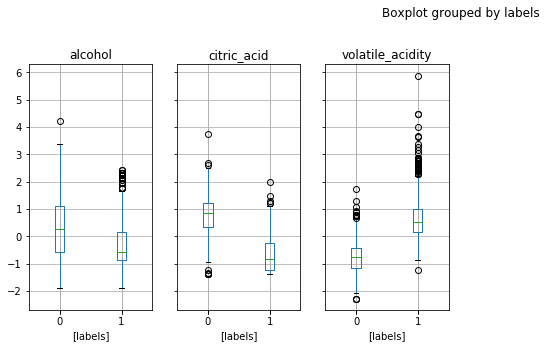

In [52]:
finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))

### Agglomerative Clustering Dendogram

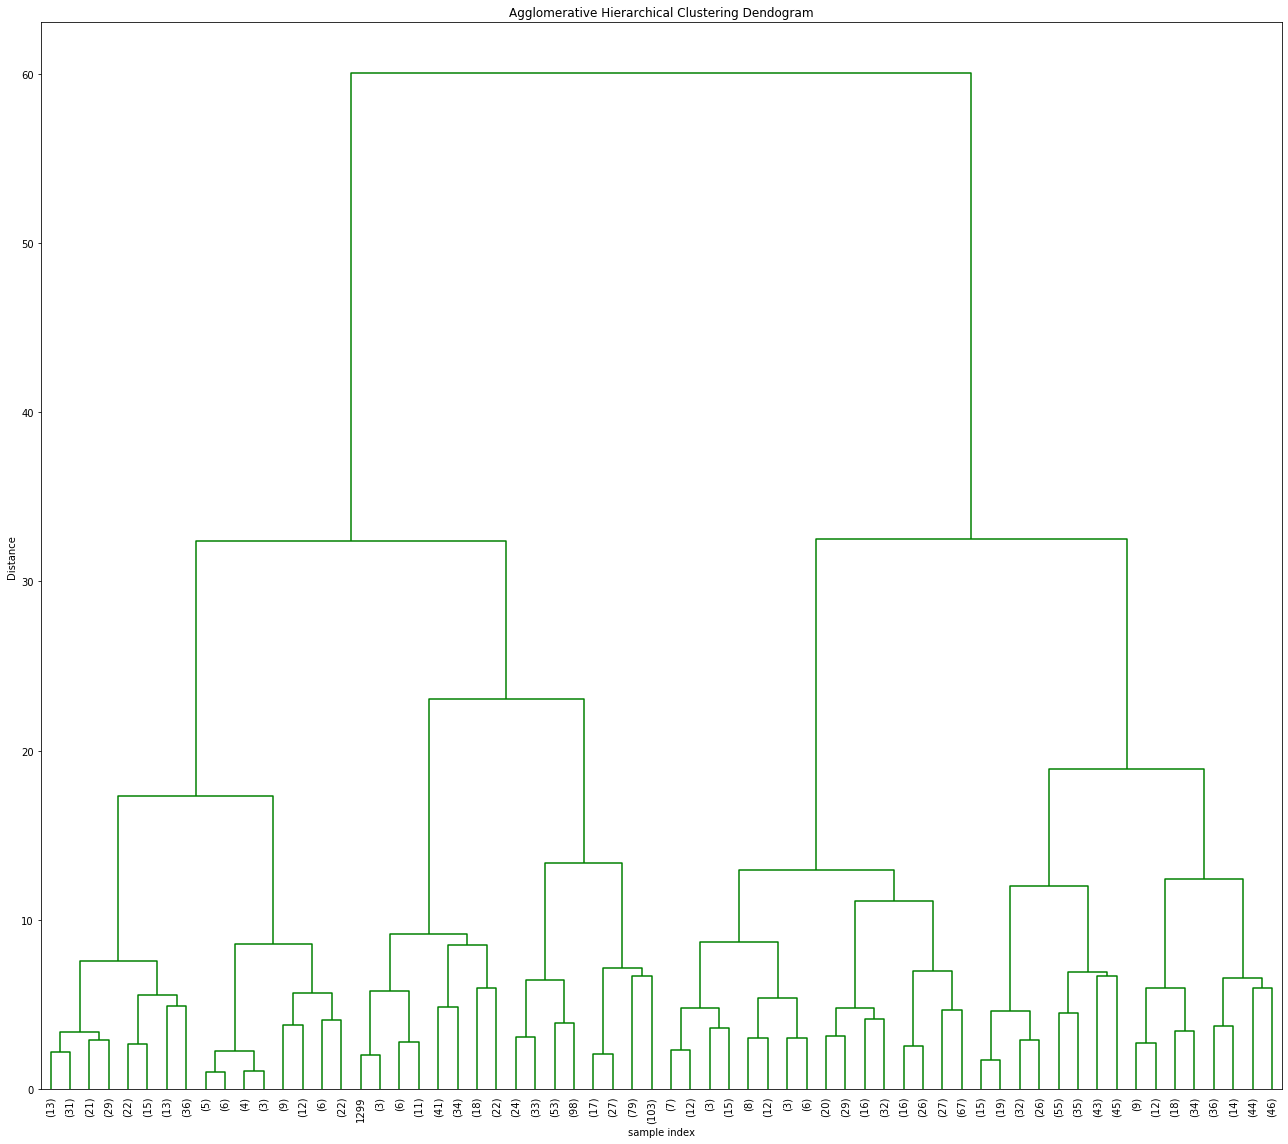

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### We can see 2 perfect clusters in the dendogram

### So we can say that because of the use of non-significant features, the clusters we observed above were not that good